# Pre-processing

## Import dependencies

In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

print(f'Package versions: \n')

print(f'numpy {np.__version__}')
print(f'scipy {scipy.__version__}')
print(f'pandas {pd.__version__}')
print(f'seaborn {sns.__version__}')
print(f'scikit-learn {sklearn.__version__}')

# Notebook tested on: 
# numpy 1.22.2
# scipy 1.7.1
# pandas 1.3.4
# seaborn 0.11.2
# scikit-learn 0.24.2

Package versions: 

numpy 1.23.1
scipy 1.9.2
pandas 1.4.4
seaborn 0.12.0
scikit-learn 1.1.2


In [2]:
# This is to clear the warnings from the notebook, usually we should leave this on
import warnings
warnings.filterwarnings('ignore') 

# Plot settings
sns.set_context('notebook') # optimises figures for notebook display
sns.set_style('ticks') # set default plot style
colours = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', 
          '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colours) # set custom color scheme
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)

In [3]:
# Make noise after finish executing cell

#method 1
from IPython.lib.display import Audio
import numpy as np

framerate = 4410
play_time_seconds = 1

t = np.linspace(0, play_time_seconds, framerate*play_time_seconds)
audio_data = np.sin(2*np.pi*300*t) + np.sin(2*np.pi*240*t)

# Audio(audio_data, rate=framerate, autoplay=True)

#method 2
import winsound
# winsound.MessageBeep()

## Import data

In [4]:
df1 = pd.read_parquet(r'COVID_Cases_Restricted_Details_03312021_Part_1_parquetnew.parquet')
df2 = pd.read_parquet(r'COVID_Cases_Restricted_Details_03312021_Part_2_parquetnew.parquet')
df3 = pd.read_parquet(r'COVID_Cases_Restricted_Details_03312021_Part_3_parquetnew.parquet')

In [5]:
frames = [df1, df2, df3]
df = pd.concat(frames)

In [6]:
df.head().T

index,4,8,13,14,16
race_ethnicity_combined,NA,"Black, Non-Hispanic",NA,NA,NA
current_status,Laboratory-confirmed case,Laboratory-confirmed case,Laboratory-confirmed case,Probable Case,Laboratory-confirmed case
cdc_case_earliest_dt,2020-07-07 00:00:00,2020-07-02 00:00:00,2020-10-30 00:00:00,2020-10-30 00:00:00,2020-05-29 00:00:00
cdc_report_dt,2020-07-13 00:00:00,2020-07-04 00:00:00,2020-10-30 00:00:00,2021-02-03 00:00:00,2020-05-29 00:00:00
sex,Male,Male,Male,Male,Male
onset_dt,2020-07-07 00:00:00,2020-07-02 00:00:00,NaT,NaT,NaT
pos_spec_dt,None,None,2020-10-30,2020-10-30,2020-05-29
hosp_yn,No,No,No,No,No
icu_yn,Unknown,No,Missing,Missing,Missing
death_yn,Unknown,Unknown,Missing,No,Missing


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1515261 entries, 4 to 7131819
Data columns (total 32 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   race_ethnicity_combined  1515261 non-null  object        
 1   current_status           1515261 non-null  object        
 2   cdc_case_earliest_dt     1515261 non-null  datetime64[ns]
 3   cdc_report_dt            1515260 non-null  datetime64[ns]
 4   sex                      1515261 non-null  object        
 5   onset_dt                 1328084 non-null  datetime64[ns]
 6   pos_spec_dt              1070506 non-null  object        
 7   hosp_yn                  1515261 non-null  object        
 8   icu_yn                   1515261 non-null  object        
 9   death_yn                 1515261 non-null  object        
 10  hc_work_yn               1515261 non-null  object        
 11  pna_yn                   1515261 non-null  object        
 12  

## 'Unknown' values
1. Convert 'Missing' values into 'Unknown'
2. Fill NaNs with 'Unkown' string

In [8]:
df = df.apply(lambda x: x.replace('Missing', 'Unknown'))
df

,race_ethnicity_combined,current_status,cdc_case_earliest_dt,cdc_report_dt,sex,onset_dt,pos_spec_dt,hosp_yn,icu_yn,death_yn,...,sob_yn,nauseavomit_yn,headache_yn,abdom_yn,diarrhea_yn,medcond_yn,county_fips_code,res_county,res_state,age_group
index,,,,,,,,,,,,,,,,,,,,,
4,NA,Laboratory-confirmed case,2020-07-07,2020-07-13,Male,2020-07-07,None,No,Unknown,Unknown,...,No,No,Yes,Yes,No,Yes,17001,ADAMS,IL,30 - 39 Years
8,"Black, Non-Hispanic",Laboratory-confirmed case,2020-07-02,2020-07-04,Male,2020-07-02,None,No,No,Unknown,...,No,No,Yes,No,No,Unknown,17001,ADAMS,IL,60 - 69 Years
13,NA,Laboratory-confirmed case,2020-10-30,2020-10-30,Male,NaT,2020-10-30,No,Unknown,Unknown,...,No,No,Yes,No,Yes,Yes,72001,ADJUNTAS,PR,70 - 79 Years
14,NA,Probable Case,2020-10-30,2021-02-03,Male,NaT,2020-10-30,No,Unknown,No,...,Unknown,Unknown,Unknown,Unknown,Unknown,Yes,72001,ADJUNTAS,PR,70 - 79 Years
16,NA,Laboratory-confirmed case,2020-05-29,2020-05-29,Male,NaT,2020-05-29,No,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Yes,72001,ADJUNTAS,PR,70 - 79 Years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7131763,"White, Non-Hispanic",Laboratory-confirmed case,2021-01-21,2021-01-21,Female,NaT,2021-01-21,No,Unknown,No,...,Unknown,Unknown,Unknown,Unknown,Unknown,Yes,50027,WINDSOR,VT,50 - 59 Years
7131764,"White, Non-Hispanic",Laboratory-confirmed case,2021-02-03,2021-03-22,Female,2021-02-03,2021-02-06,No,Unknown,No,...,No,No,Yes,No,No,No,50027,WINDSOR,VT,50 - 59 Years
7131765,"White, Non-Hispanic",Laboratory-confirmed case,2021-01-28,2021-01-28,Female,NaT,2021-01-28,No,Unknown,No,...,Unknown,Unknown,Unknown,Unknown,Unknown,Yes,50027,WINDSOR,VT,50 - 59 Years


In [9]:
df = df.apply(lambda x: x.replace('NA', 'Unknown'))
df = df.fillna('Unknown')

## Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [11]:
df_encoded = df.copy()

In [12]:
def label_encode(df, features):
    for feature in features:
        le = LabelEncoder()
        label_encoded = le.fit_transform(df[f'{feature}'])
        df_encoded[f'{feature}'] = label_encoded
        
def target_encode(df, features):
    for feature in features:
        te = TargetEncoder()
        te_encoded = te.fit_transform(df[f'{feature}'], df_encoded['pna_yn'])
        df_encoded[f'{feature}'] = te_encoded
        
def ordinal_encode(df, features):
    for feature in features:
        oe = OrdinalEncoder()
        oe_encoded = oe.fit_transform(df[f'{feature}'], df_encoded['pna_yn'])
        df_encoded[f'{feature}'] = oe_encoded
        
def onehot_encode(df, features):
    for feature in features:
        ohe = OneHotEncoder(drop='missing', sparse=False)
        onehot_encoded = ohe.fit_transform(df[f'{feature}'])
        df_encoded = pd.concat([df, onehot_encoded], axis=1)
        df_encoded.drop(f'{feature}', axis=1, inplace=True)

In [13]:
le_features = ['pna_yn', 'current_status', 'hosp_yn', 'icu_yn', 'death_yn', 'hc_work_yn',
              'abxchest_yn', 'acuterespdistress_yn', 'mechvent_yn',
              'fever_yn', 'sfever_yn', 'chills_yn', 'myalgia_yn',
              'runnose_yn', 'sthroat_yn', 'cough_yn', 'sob_yn',
              'nauseavomit_yn', 'headache_yn', 'abdom_yn', 
               'diarrhea_yn', 'medcond_yn', 'sex'] 
# Note: i think '_yn' stands for yes no

# te_features = ['race_ethnicity_combined', 'res_state'] # res_county dropped for cardinality
te_features = ['race_ethnicity_combined', 'res_county', 'res_state']

# oe_features = ['age_group'] #not needed anymore, manually converted to numerical data

# ohe_features = ['sex'] # moved to label encoder

other_features = ['cdc_report_dt', 'cdc_case_earliest_dt', 'county_fips_code', 
                  'onset_dt', 'pos_spec_dt']

In [14]:
label_encode(df, le_features)

In [15]:
target_encode(df, te_features)

In [16]:
df_encoded['age_group'].value_counts()

20 - 29 Years    267551
30 - 39 Years    228548
40 - 49 Years    224077
50 - 59 Years    219631
10 - 19 Years    178461
60 - 69 Years    167067
70 - 79 Years     96402
0 - 9 Years       66575
80+ Years         62167
Unknown            4782
Name: age_group, dtype: int64

In [17]:
# replace bin by the mean of range
df_encoded['age_group'] = df_encoded['age_group'].apply(lambda x: x.replace('Years', ''))
df_encoded['age_group'] = df_encoded['age_group'].apply(lambda x: x.replace('0 - 9', '5'))
df_encoded['age_group'] = df_encoded['age_group'].apply(lambda x: x.replace('10 - 19', '15'))
df_encoded['age_group'] = df_encoded['age_group'].apply(lambda x: x.replace('20 - 29', '25'))
df_encoded['age_group'] = df_encoded['age_group'].apply(lambda x: x.replace('30 - 39', '35'))
df_encoded['age_group'] = df_encoded['age_group'].apply(lambda x: x.replace('40 - 49', '45'))
df_encoded['age_group'] = df_encoded['age_group'].apply(lambda x: x.replace('50 - 59', '55'))
df_encoded['age_group'] = df_encoded['age_group'].apply(lambda x: x.replace('60 - 69', '65'))
df_encoded['age_group'] = df_encoded['age_group'].apply(lambda x: x.replace('70 - 79', '75'))
df_encoded['age_group'] = df_encoded['age_group'].apply(lambda x: x.replace('80+', '85'))

In [18]:
# replace 'Unknown' with median
df_encoded['age_group'] = df_encoded['age_group'].replace('Unknown', np.nan)
df_encoded['age_group'] = df_encoded['age_group'].fillna(int(df_encoded['age_group'].median()))
df_encoded['age_group'] = df_encoded['age_group'].astype(int)

In [19]:
df_encoded['age_group'].value_counts()

25    267551
45    228859
35    228548
55    219631
15    178461
65    167067
75     96402
5      66575
85     62167
Name: age_group, dtype: int64

label_encode(df, le_features)
target_encode(df, te_features)
ordinal_encode(df, oe_features)
onehot_encode(df, ohe_features)

experiment - testing

In [20]:
# label_encode(df, ['current_status'])

In [21]:
df['current_status'].value_counts(dropna=False)

Laboratory-confirmed case    1400366
Probable Case                 114895
Name: current_status, dtype: int64

In [22]:
df_encoded['current_status'].value_counts(dropna=False)

0    1400366
1     114895
Name: current_status, dtype: int64

## drop 'unnecessary' variables

In [23]:
df_cleaned = df_encoded.drop(other_features, axis=1)

## Save df as parqueet

In [24]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1515261 entries, 4 to 7131819
Data columns (total 27 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   race_ethnicity_combined  1515261 non-null  float64
 1   current_status           1515261 non-null  int32  
 2   sex                      1515261 non-null  int32  
 3   hosp_yn                  1515261 non-null  int32  
 4   icu_yn                   1515261 non-null  int32  
 5   death_yn                 1515261 non-null  int32  
 6   hc_work_yn               1515261 non-null  int32  
 7   pna_yn                   1515261 non-null  int32  
 8   abxchest_yn              1515261 non-null  int32  
 9   acuterespdistress_yn     1515261 non-null  int32  
 10  mechvent_yn              1515261 non-null  int32  
 11  fever_yn                 1515261 non-null  int32  
 12  sfever_yn                1515261 non-null  int32  
 13  chills_yn                1515261 non-null 

In [25]:
df_cleaned.to_parquet('df_cleaned.parquet')

In [26]:
df_cleaned = pd.read_parquet('df_cleaned.parquet')

In [27]:
df_cleaned.head()

,race_ethnicity_combined,current_status,sex,hosp_yn,icu_yn,death_yn,hc_work_yn,pna_yn,abxchest_yn,acuterespdistress_yn,...,cough_yn,sob_yn,nauseavomit_yn,headache_yn,abdom_yn,diarrhea_yn,medcond_yn,res_county,res_state,age_group
index,,,,,,,,,,,,,,,,,,,,,
4,0.060017,0,1,0,1,1,1,0,1,1,...,0,0,0,2,2,0,2,0.070389,0.225918,35
8,0.108255,0,1,0,0,1,1,0,2,1,...,0,0,0,2,0,0,1,0.070389,0.225918,65
13,0.060017,0,1,0,1,1,1,0,1,0,...,2,0,0,2,0,2,2,0.026786,0.430685,75
14,0.060017,1,1,0,1,0,1,0,1,0,...,1,1,1,1,1,1,2,0.026786,0.430685,75
16,0.060017,0,1,0,1,1,1,0,1,0,...,1,1,1,1,1,1,2,0.026786,0.430685,75


## Training test split

In [28]:
X = df_cleaned[df_cleaned.columns[df_cleaned.columns != 'pna_yn']]
y = df_cleaned['pna_yn']

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

## Feature scaling

In [30]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

## Class imbalance

In [31]:
y_train.value_counts(normalize=True)

0    0.933405
1    0.066595
Name: pna_yn, dtype: float64

# Logistic Regression
https://www.analyticsvidhya.com/blog/2021/09/guide-for-building-an-end-to-end-logistic-regression-model/

## Hyperparameter Tuning
Penalty: l1 vs elastic net
(with solver as 'saga')

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# create model
lr = LogisticRegression(solver='saga',
                        random_state=0)

# hyperparameters
distributions = dict(penalty = ['l1','elasticnet'])

# prepare crossvalidation
kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# create the random search
lr_search = RandomizedSearchCV(lr,
                               distributions,
                               random_state=0,
                               cv = kfold,
                               scoring="f1",
                               verbose=2)

#fit the model
search = lr_search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .........................................penalty=l1; total time=   7.2s
[CV] END .........................................penalty=l1; total time=   7.1s
[CV] END .........................................penalty=l1; total time=   7.1s
[CV] END .........................................penalty=l1; total time=   7.1s
[CV] END .........................................penalty=l1; total time=   6.6s
[CV] END .................................penalty=elasticnet; total time=   0.0s
[CV] END .................................penalty=elasticnet; total time=   0.0s
[CV] END .................................penalty=elasticnet; total time=   0.0s
[CV] END .................................penalty=elasticnet; total time=   0.0s
[CV] END .................................penalty=elasticnet; total time=   0.0s


In [33]:
# obtain best hyperparameter
print("Best F1 score: ", search.best_score_)
print("Best hyperparameters: ", search.best_params_)
# print(search.best_estimator_)

Best F1 score:  0.7473232371742784
Best hyperparameters:  {'penalty': 'l1'}


According to random-search cross-validation, the best penalty is the 'l1'

Since penalty is 'l1', can tune for solver: 'saga vs sag'

In [34]:
# create model
lr = LogisticRegression(penalty='l1',
                        random_state=0)

# hyperparameters
distributions = dict(solver = ['sag','saga'])

# prepare crossvalidation
kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# create the random search
lr_search = RandomizedSearchCV(lr,
                               distributions,
                               random_state=0,
                               cv = kfold,
                               scoring="f1",
                               verbose=2)

#fit the model
search = lr_search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .........................................solver=sag; total time=   0.0s
[CV] END .........................................solver=sag; total time=   0.0s
[CV] END .........................................solver=sag; total time=   0.0s
[CV] END .........................................solver=sag; total time=   0.0s
[CV] END .........................................solver=sag; total time=   0.0s
[CV] END ........................................solver=saga; total time=   7.1s
[CV] END ........................................solver=saga; total time=   7.1s
[CV] END ........................................solver=saga; total time=   7.1s
[CV] END ........................................solver=saga; total time=   7.1s
[CV] END ........................................solver=saga; total time=   6.6s


In [35]:
# obtain best hyperparameter
print("Best F1 score: ", search.best_score_)
print("Best hyperparameters: ", search.best_params_)
# print(search.best_estimator_)

Best F1 score:  0.7473232371742784
Best hyperparameters:  {'solver': 'saga'}


## Best model

In [36]:
# create model with best params
lr2 = LogisticRegression(penalty = 'l1',
                        solver='saga',
                        random_state=0)

# fit model
lr2.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=0, solver='saga')

In [37]:
# predict probabilities on Test and take probability for class 1([:1])
y_pred_prob_test = lr2.predict_proba(X_test)[:, 1]

#predict labels on test dataset
y_pred_test = lr2.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix is : \n", cm)
print("\n")

# ROC- AUC score
print("ROC-AUC score test dataset:  \t", roc_auc_score(y_test,y_pred_prob_test))
#Precision score
print("Precision score test dataset:\t", precision_score(y_test,y_pred_test))
#Recall Score
print("Recall score test dataset:  \t", recall_score(y_test,y_pred_test))
#f1 score
print("f1 score test dataset :  \t", f1_score(y_test,y_pred_test))

Confusion Matrix is : 
 [[462867   3945]
 [ 10883  22342]]


ROC-AUC score test dataset:  	 0.9566734421767018
Precision score test dataset:	 0.8499258188458173
Recall score test dataset:  	 0.6724454477050413
f1 score test dataset :  	 0.7508401666890712


## Feature importance
https://machinelearningmastery.com/calculate-feature-importance-with-python/
https://zetcode.com/python/fstring/
https://realpython.com/python-formatted-output/
https://stackoverflow.com/questions/59890977/f-string-multiple-format-specifiers

In [39]:
# get importance
importance = lr2.coef_[0]

# summarize feature importance
features = df_cleaned.columns
for i,v in enumerate(importance):
    print(f'({i}) {features[i] : <25}: {v : ^30.3f}')

(0) race_ethnicity_combined  :             0.026             
(1) current_status           :             -0.071            
(2) sex                      :             0.060             
(3) hosp_yn                  :             0.642             
(4) icu_yn                   :             -0.068            
(5) death_yn                 :             0.120             
(6) hc_work_yn               :             -0.009            
(7) pna_yn                   :             1.247             
(8) abxchest_yn              :             0.347             
(9) acuterespdistress_yn     :             0.040             
(10) mechvent_yn              :             0.172             
(11) fever_yn                 :             0.113             
(12) sfever_yn                :             0.072             
(13) chills_yn                :             0.019             
(14) myalgia_yn               :             -0.143            
(15) runnose_yn               :             -0.029            
(1

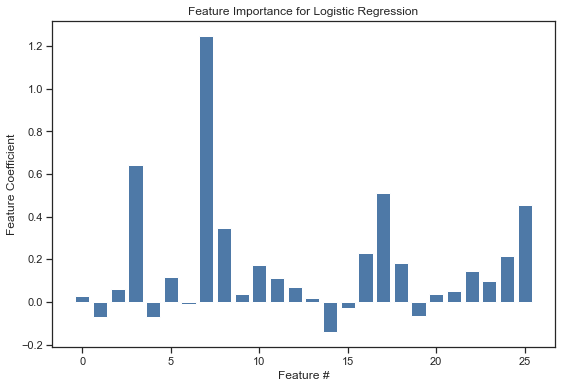

In [66]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('Feature Importance for Logistic Regression')
plt.xlabel('Feature #')
plt.ylabel('Feature Coefficient')
plt.savefig('Feature Importance for Logistic Regression.jpg', bbox_inches='tight')
plt.show()

Note: May need to un-normalize features to extract analysis

## Regularization Path
https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_path.html

In [43]:
%%time

from sklearn import linear_model
from sklearn.svm import l1_min_c

cs = l1_min_c(X_train, y_train, loss="log") * np.logspace(0, 7, 16)

clf = linear_model.LogisticRegression(
    penalty="l1",
    solver="saga",
    tol=1e-6,
    max_iter=int(1e6),
    warm_start=True,
    intercept_scaling=10000.0,
    random_state=0
)

coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())

coefs_ = np.array(coefs_)

CPU times: total: 3h 9min 20s
Wall time: 3h 9min 30s


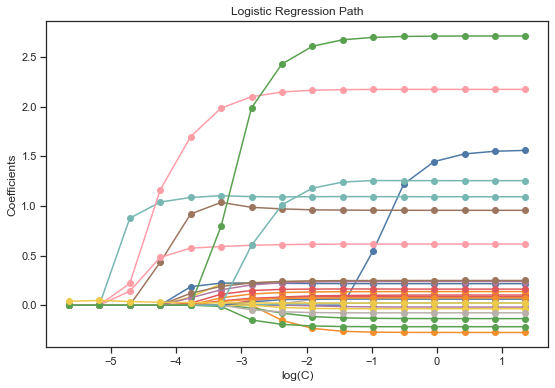

In [68]:
import matplotlib.pyplot as plt

plt.plot(np.log10(cs), coefs_, marker="o")
ymin, ymax = plt.ylim()
plt.xlabel("log(C)")
plt.ylabel("Coefficients")
plt.title("Logistic Regression Path")
plt.axis("tight")
plt.savefig('regularization_path 1.jpg', bbox_inches='tight')
plt.show()

In [69]:
%%time

from sklearn import linear_model
from sklearn.svm import l1_min_c

cs = l1_min_c(X_train, y_train, loss="log") * np.logspace(0, 7, 16)

clf = linear_model.LogisticRegression(
    penalty="l1",
    solver="saga",
    tol=1e-4,
    max_iter=int(1e6),
    warm_start=True,
    intercept_scaling=10000.0,
    random_state=0
)

coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())

coefs_ = np.array(coefs_)

CPU times: total: 42min 9s
Wall time: 42min 14s


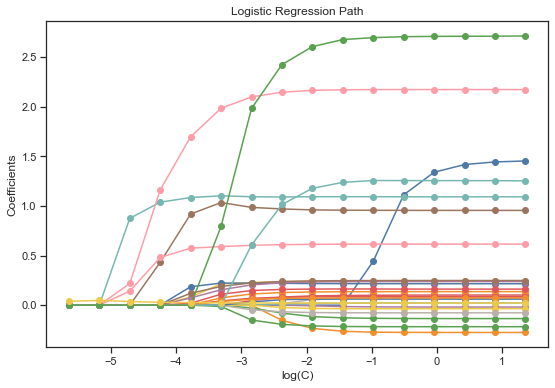

In [70]:
import matplotlib.pyplot as plt

plt.plot(np.log10(cs), coefs_, marker="o")
ymin, ymax = plt.ylim()
plt.xlabel("log(C)")
plt.ylabel("Coefficients")
plt.title("Logistic Regression Path")
plt.axis("tight")
plt.savefig('regularization_path 2.jpg', bbox_inches='tight')
plt.show()

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.lasso_path.html#sklearn.linear_model.lasso_path

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html#sphx-glr-auto-examples-linear-model-plot-lasso-coordinate-descent-path-py

# LinearSVC
https://www.youtube.com/watch?v=jzKSAeJpC6s

Often in Machine Learning and Data Science, you need to perform a sequence of different transformations of the input data (such as finding a set of features or generating new features) before applying a final estimator. Pipeline gives you a single interface for encapsulating transformers and predictors to simplify the process. Since transformers are usually combined with estimators for preprocessing, using pipeline in scikit-learn can be really useful. To be precise, Pipelines sequentially apply a list of transformers and a final estimator. Therefore, the purpose of the pipeline is to assemble several steps that can be cross-validated while setting different parameters.

In summary: Piplelines are built up of a list of transformers and a final estimator, allowing us to make predictions based on the raw input data (basically pre-processing).

* https://scikit-learn.org/stable/modules/svm.html
* https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
* https://towardsdatascience.com/everything-about-svm-classification-above-and-beyond-cc665bfd993e

## Benchmark model

In [45]:
%%time

from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svc = make_pipeline(StandardScaler(),
                    LinearSVC(penalty='l1', dual=False, random_state=0))

svc.fit(X_train, y_train)

CPU times: total: 5.75 s
Wall time: 5.76 s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(dual=False, penalty='l1', random_state=0))])

In [46]:
print(svc.named_steps['linearsvc'].coef_)
print(svc.named_steps['linearsvc'].intercept_)
print(svc.predict(X_test))

[[ 0.0062206  -0.01441258  0.01631655  0.17305426 -0.02016489  0.03562661
  -0.00659419  0.34545787  0.08378971  0.0148933   0.04020687  0.02022684
   0.01109387  0.00246272 -0.03585091 -0.00305641  0.04938131  0.10287676
   0.04161665 -0.01357516  0.01068997  0.00681525  0.03161003  0.02826899
   0.06038328  0.08752122]]
[-1.20242551]
[0 0 0 ... 0 0 0]


In [47]:
#predict labels on test dataset
y_pred_test = svc.predict(X_test)

#f1 score
print("f1 score test dataset :  \t", f1_score(y_test,y_pred_test))

f1 score test dataset :  	 0.747254624015849


## Hyperparameter tuning
Hyperparameter tuning penalty term.
If l1, loss must be the default squared_hinge, but if l2, can hypertune for hinge vs squared_hinge.

In [48]:
# create model
# svc2 = make_pipeline(StandardScaler(),
#                      LinearSVC(dual=False, random_state=0))

svc2 = LinearSVC(dual=False, random_state=0)


# hyperparameters
distributions = dict(penalty = ['l1','l2'])

# prepare crossvalidation
kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# create the random search
svc2_search = RandomizedSearchCV(svc2,
                                   distributions,
                                   random_state=0,
                                   cv = kfold,
                                   scoring="f1",
                                   verbose=2)

#fit the model
search2 = svc2_search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .........................................penalty=l1; total time=   4.3s
[CV] END .........................................penalty=l1; total time=   4.3s
[CV] END .........................................penalty=l1; total time=   4.3s
[CV] END .........................................penalty=l1; total time=   4.4s
[CV] END .........................................penalty=l1; total time=   4.3s
[CV] END .........................................penalty=l2; total time=   2.1s
[CV] END .........................................penalty=l2; total time=   2.4s
[CV] END .........................................penalty=l2; total time=   2.3s
[CV] END .........................................penalty=l2; total time=   2.1s
[CV] END .........................................penalty=l2; total time=   2.3s


In [49]:
# obtain best hyperparameter
print("Best F1 score: ", search2.best_score_)
print("Best hyperparameters: ", search2.best_params_)
# print(search.best_estimator_)

Best F1 score:  0.7428943241296023
Best hyperparameters:  {'penalty': 'l1'}


Hyperparameter tuning with pipeline

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# create model
svc3 = Pipeline([('scale', StandardScaler()),
                 ('svc', LinearSVC(dual=False, random_state=0))])

# hyperparameters
param_grid = {'svc__penalty': ['l1','l2']}
# param_grid = {'svc__loss': ['square_hinge', 'hinge']}

# prepare crossvalidation
kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# create the random search
svc3_search = GridSearchCV(svc3,
                           param_grid,
                           cv = kfold,
                           scoring="f1",
                           verbose=2)

#fit the model
search3 = svc3_search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ....................................svc__penalty=l1; total time=   4.6s
[CV] END ....................................svc__penalty=l1; total time=   4.7s
[CV] END ....................................svc__penalty=l1; total time=   4.7s
[CV] END ....................................svc__penalty=l1; total time=   4.6s
[CV] END ....................................svc__penalty=l1; total time=   4.6s
[CV] END ....................................svc__penalty=l2; total time=   2.7s
[CV] END ....................................svc__penalty=l2; total time=   2.6s
[CV] END ....................................svc__penalty=l2; total time=   2.4s
[CV] END ....................................svc__penalty=l2; total time=   2.4s
[CV] END ....................................svc__penalty=l2; total time=   2.7s


In [51]:
# obtain best hyperparameter
print("Best F1 score: ", search3.best_score_)
print("Best hyperparameters: ", search3.best_params_)
# print(search.best_estimator_)

Best F1 score:  0.7428943241296023
Best hyperparameters:  {'svc__penalty': 'l1'}


## Best model

In [52]:
svc4 = Pipeline([('scale', StandardScaler()),
                 ('svc', LinearSVC(penalty='l1', dual=False, random_state=0))])

svc4.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('svc', LinearSVC(dual=False, penalty='l1', random_state=0))])

In [53]:
print(svc4.named_steps['svc'].coef_) #need to use .named_steps[''] to access model in pipeline
print(svc4.named_steps['svc'].intercept_)
print(svc4.named_steps['svc'].predict(X_test))

[[ 0.0062206  -0.01441258  0.01631655  0.17305426 -0.02016489  0.03562661
  -0.00659419  0.34545787  0.08378971  0.0148933   0.04020687  0.02022684
   0.01109387  0.00246272 -0.03585091 -0.00305641  0.04938131  0.10287676
   0.04161665 -0.01357516  0.01068997  0.00681525  0.03161003  0.02826899
   0.06038328  0.08752122]]
[-1.20242551]
[0 0 0 ... 0 0 0]


In [54]:
#predict labels on test dataset
y_pred_test = svc4.named_steps['svc'].predict(X_test)

#f1 score
print("f1 score test dataset :  \t", f1_score(y_test,y_pred_test))

f1 score test dataset :  	 0.747254624015849


## Feature importance
https://aneesha.medium.com/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d

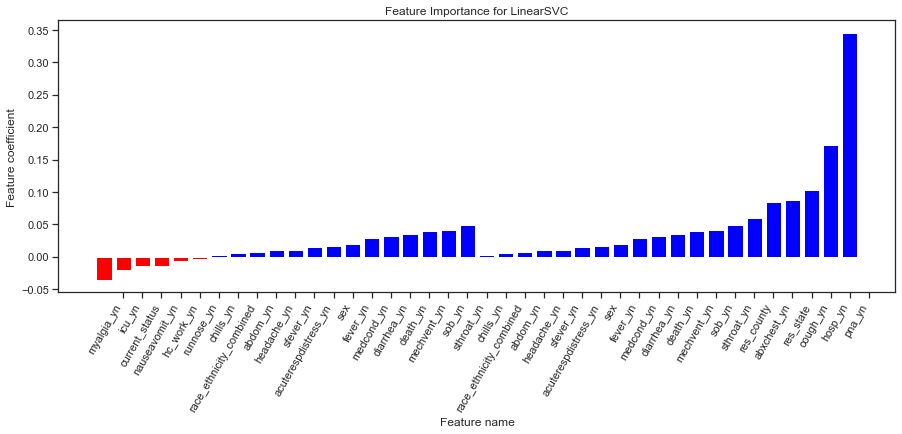

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.ylabel('Feature coefficient')
    plt.xlabel('Feature name')
    plt.title('Feature Importance for LinearSVC')
    plt.savefig('Feature Importance for Linear SVC.jpg', bbox_inches='tight')
    plt.show()
    
plot_coefficients(svc4.named_steps['svc'], features)